In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('ER_Wait_Time_Dataset.csv')
df.head()

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2/10/2024,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,11/28/2024,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,9/30/2024,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2/27/2024,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,3/6/2024,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Visit ID                            5000 non-null   object
 1   Patient ID                          5000 non-null   object
 2   Hospital ID                         5000 non-null   object
 3   Hospital Name                       5000 non-null   object
 4   Region                              5000 non-null   object
 5   Visit Date                          5000 non-null   object
 6   Day of Week                         5000 non-null   object
 7   Season                              5000 non-null   object
 8   Time of Day                         5000 non-null   object
 9   Urgency Level                       5000 non-null   object
 10  Nurse-to-Patient Ratio              5000 non-null   int64 
 11  Specialist Availability             5000 non-null   int6

In [19]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.drop_duplicated(inplace=True)#للتعديل على الداتا الاصليه نضع trueو للتعديل ووضع نسخه جديدة نضع false

In [20]:
df.duplicated().sum()

np.int64(0)

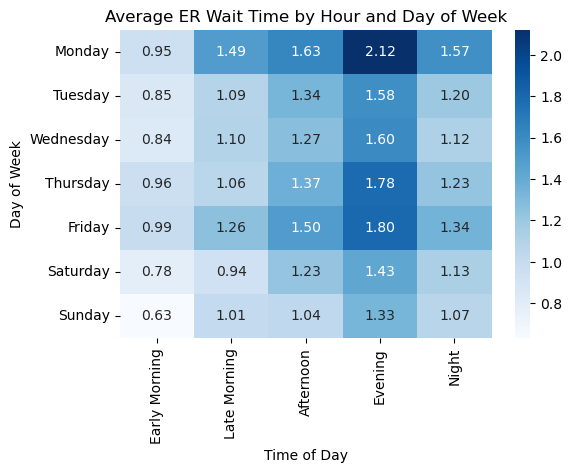

In [48]:
df['Total_Wait_Hours'] = df['Total Wait Time (min)'] / 60

heat_data = df.pivot_table(
    index='Day of Week',
    columns='Time of Day',
    values='Total_Wait_Hours',
    aggfunc='mean'
)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heat_data = heat_data.reindex(index=day_order)

time_order = ['Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Night']
heat_data = heat_data.reindex(columns=time_order)

plt.figure(figsize=(6, 4))
sns.heatmap(heat_data, annot=True, cmap='Blues', fmt=".2f")
plt.title("Average ER Wait Time by Hour and Day of Week")
plt.xlabel("Time of Day")
plt.ylabel("Day of Week")
plt.show()

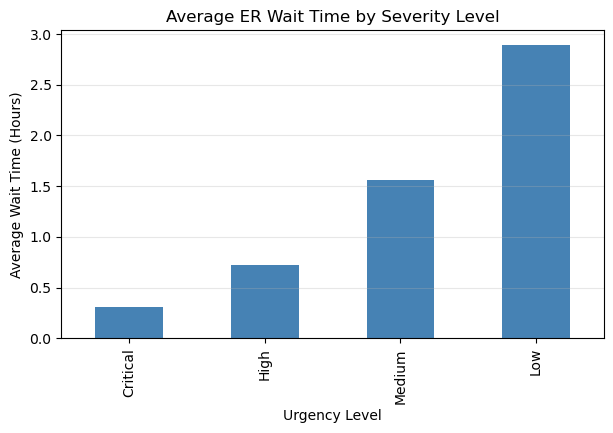

In [49]:
df['Total_Wait_Hours'] = df['Total Wait Time (min)'] / 60

severity_wait = df.groupby('Urgency Level')['Total_Wait_Hours'].mean().sort_values()

plt.figure(figsize=(7,4))
severity_wait.plot(kind='bar', color='steelblue')
plt.xlabel("Urgency Level")
plt.ylabel("Average Wait Time (Hours)")
plt.title("Average ER Wait Time by Severity Level")
plt.grid(axis='y', alpha=0.3)
plt.show()

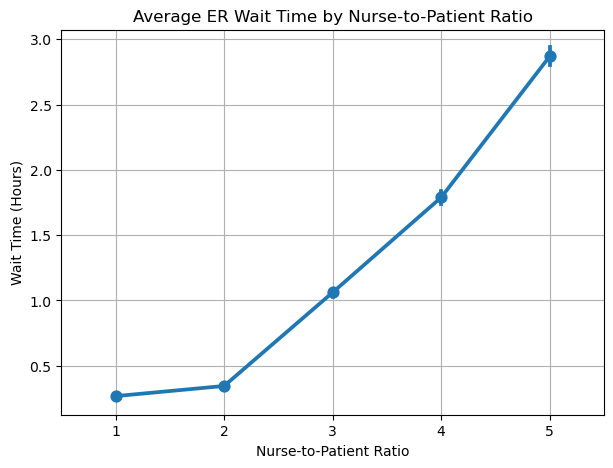

In [53]:
df['Total_Wait_Hours'] = df['Total Wait Time (min)'] / 60

plt.figure(figsize=(7,5))
sns.pointplot(x='Nurse-to-Patient Ratio', y='Total_Wait_Hours', data=df)
plt.title("Average ER Wait Time by Nurse-to-Patient Ratio")
plt.xlabel("Nurse-to-Patient Ratio")
plt.ylabel("Wait Time (Hours)")
plt.grid(True)
plt.show()

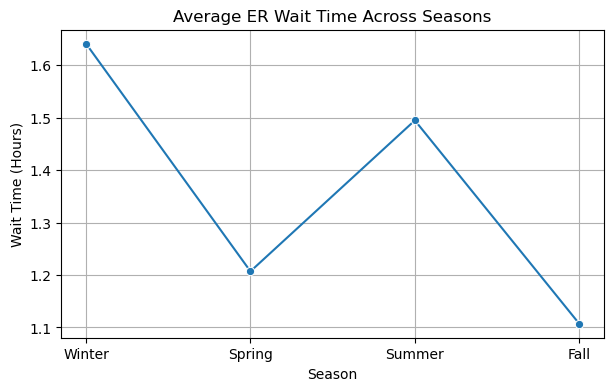

In [56]:
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_wait = df.groupby('Season')['Total_Wait_Hours'].mean().reindex(season_order)

plt.figure(figsize=(7,4))
sns.lineplot(x=season_wait.index, y=season_wait.values, marker='o')
plt.title("Average ER Wait Time Across Seasons")
plt.xlabel("Season")
plt.ylabel("Wait Time (Hours)")
plt.grid(True)
plt.show()

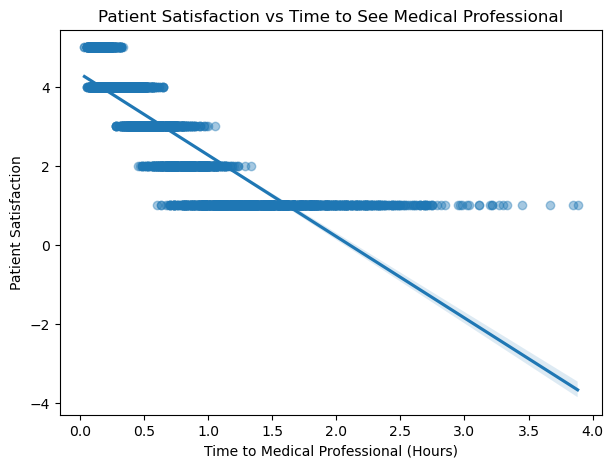

In [57]:
df['Time_to_MD_Hours'] = df['Time to Medical Professional (min)'] / 60

plt.figure(figsize=(7,5))
sns.regplot(x='Time_to_MD_Hours', y='Patient Satisfaction', data=df, scatter_kws={'alpha':0.4})
plt.title("Patient Satisfaction vs Time to See Medical Professional")
plt.xlabel("Time to Medical Professional (Hours)")
plt.ylabel("Patient Satisfaction")
plt.show()

In [59]:
df.columns

Index(['Visit ID', 'Patient ID', 'Hospital ID', 'Hospital Name', 'Region',
       'Visit Date', 'Day of Week', 'Season', 'Time of Day', 'Urgency Level',
       'Nurse-to-Patient Ratio', 'Specialist Availability',
       'Facility Size (Beds)', 'Time to Registration (min)',
       'Time to Triage (min)', 'Time to Medical Professional (min)',
       'Total Wait Time (min)', 'Patient Outcome', 'Patient Satisfaction',
       'Hour', 'Total_Wait_Hours', 'Time_to_MD_Hours'],
      dtype='object')

In [65]:
df.to_csv("/Users/HP/streamlit/clean_data.csv", index=False, encoding="utf-8")